In [2]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
url = 'https://en.wikipedia.org/wiki/Rogers_Centre'

In [4]:
tables = pd.read_html(url)

In [5]:
len(tables)

35

In [6]:
tables[0]

,0,1
0,SkyDome[1][2],SkyDome[1][2]
1,NaN,NaN
2,Rogers Centre in 2008,Rogers Centre in 2008
3,Rogers CentreLocation in Toronto,Rogers CentreLocation in Toronto
4,Former names,SkyDome (1989–2005)
5,Address,1 Blue Jays Way
6,Location,"Toronto, Ontario"
7,Coordinates,43°38′29″N 79°23′21″W﻿ / ﻿43.64139°N 79.38917°W
8,Public transit,Union Station Union subway GO Bus Terminal ...
9,Owner,Rogers Communications


In [7]:
print(tables)

[                                                    0  \
0                                       SkyDome[1][2]   
1                                                 NaN   
2                               Rogers Centre in 2008   
3                    Rogers CentreLocation in Toronto   
4                                        Former names   
5                                             Address   
6                                            Location   
7                                         Coordinates   
8                                      Public transit   
9                                               Owner   
10                                           Operator   
11                                           Capacity   
12                                  Record attendance   
13                                         Field size   
14                                            Surface   
15                                       Construction   
16                            

In [8]:
tables[2]

,Years,Capacity
0,1989–1998,"50,516[67]"
1,1999–2002,"45,100[67]"
2,2003–2004,"50,516[67]"
3,2005–2006,"50,598[67]"
4,2007,"48,900[68]"
5,2008–2010,"49,539[69]"
6,2011–2012,"49,260[70]"
7,2013–2022,"49,282[71][72]"
8,2023,"41,500[73]"
9,2024–present,"39,150[74]"


In [9]:
stadium_capacity = tables[2]
stadium_capacity

,Years,Capacity
0,1989–1998,"50,516[67]"
1,1999–2002,"45,100[67]"
2,2003–2004,"50,516[67]"
3,2005–2006,"50,598[67]"
4,2007,"48,900[68]"
5,2008–2010,"49,539[69]"
6,2011–2012,"49,260[70]"
7,2013–2022,"49,282[71][72]"
8,2023,"41,500[73]"
9,2024–present,"39,150[74]"


In [10]:
stadium_capacity.info

<bound method DataFrame.info of           Years        Capacity
0     1989–1998      50,516[67]
1     1999–2002      45,100[67]
2     2003–2004      50,516[67]
3     2005–2006      50,598[67]
4          2007      48,900[68]
5     2008–2010      49,539[69]
6     2011–2012      49,260[70]
7     2013–2022  49,282[71][72]
8          2023      41,500[73]
9  2024–present      39,150[74]>

In [11]:
stadium_capacity.dtypes

Years       object
Capacity    object
dtype: object

In [12]:
stadium_capacity_obj = stadium_capacity.select_dtypes('object')

In [13]:
stadium_capacity[stadium_capacity_obj.columns] = stadium_capacity_obj.apply(lambda x: x.str.strip())
stadium_capacity

,Years,Capacity
0,1989–1998,"50,516[67]"
1,1999–2002,"45,100[67]"
2,2003–2004,"50,516[67]"
3,2005–2006,"50,598[67]"
4,2007,"48,900[68]"
5,2008–2010,"49,539[69]"
6,2011–2012,"49,260[70]"
7,2013–2022,"49,282[71][72]"
8,2023,"41,500[73]"
9,2024–present,"39,150[74]"


In [14]:
stadium_capacity['Capacity'] = stadium_capacity['Capacity'].str.replace(',','')
stadium_capacity

,Years,Capacity
0,1989–1998,50516[67]
1,1999–2002,45100[67]
2,2003–2004,50516[67]
3,2005–2006,50598[67]
4,2007,48900[68]
5,2008–2010,49539[69]
6,2011–2012,49260[70]
7,2013–2022,49282[71][72]
8,2023,41500[73]
9,2024–present,39150[74]


In [15]:
stadium_capacity['Capacity'] = stadium_capacity['Capacity'].str.replace("\[.*\]", "", regex=True).astype(int)

In [16]:
stadium_capacity

,Years,Capacity
0,1989–1998,50516
1,1999–2002,45100
2,2003–2004,50516
3,2005–2006,50598
4,2007,48900
5,2008–2010,49539
6,2011–2012,49260
7,2013–2022,49282
8,2023,41500
9,2024–present,39150


In [17]:
stadium_capacity.to_csv('rogers_centre_capacity_hist.csv')

<Axes: xlabel='Years'>

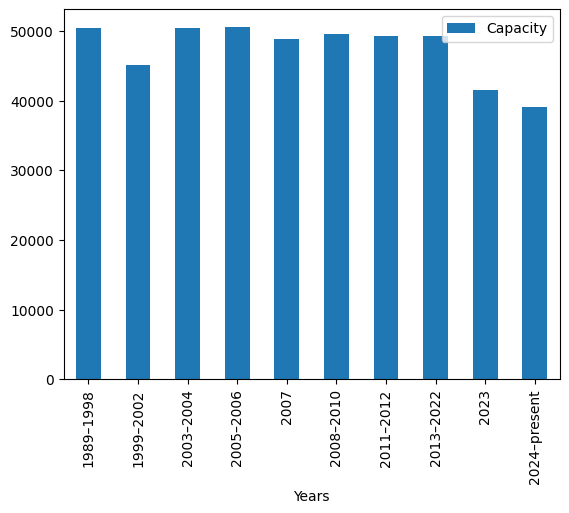

In [20]:
stadium_capacity.plot.bar(x='Years')